In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('CO2.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
df.shape

(7385, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [14]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
# Extract the relevant columns for linear regression
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

In [6]:
# Create a linear regression model
model = LinearRegression()

In [7]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [8]:
# Make predictions
y_pred = model.predict(X)

In [9]:
# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [10]:
# Print the evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared Error (R2):', r2)

Mean Absolute Error (MAE): 13.417122373253912
Mean Squared Error (MSE): 413.54464680411456
R-squared Error (R2): 0.8791960197256039


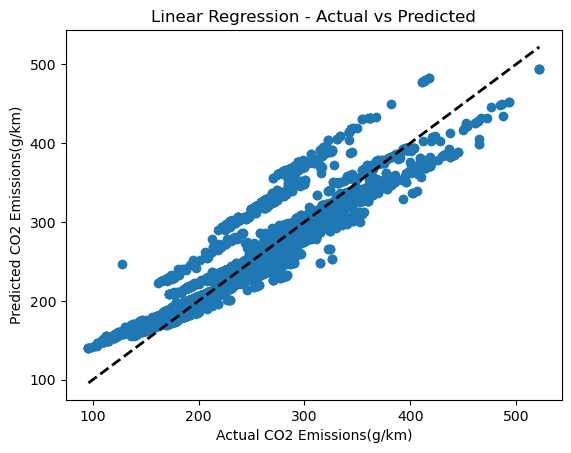

In [11]:
# Plot the actual values vs predicted values
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CO2 Emissions(g/km)')
plt.ylabel('Predicted CO2 Emissions(g/km)')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

In [15]:
# Assuming you have the trained linear regression model stored in the 'model' variable

# Create a new data point with values for the features
new_data = [[2.0, 4, 8.5]]  # Example values for engine size, cylinders, and fuel consumption

# Make the prediction
predicted_co2 = model.predict(new_data)

# Print the predicted CO2 emissions
print('Predicted CO2 Emissions:', predicted_co2)

Predicted CO2 Emissions: [200.89193293]


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
# Assuming you have the trained linear regression model stored in the 'model' variable

# Take input from the user for the features
engine_size = float(input("Enter engine size (L): "))
cylinders = int(input("Enter number of cylinders: "))
fuel_consumption = float(input("Enter fuel consumption (L/100 km): "))

# Create a new data point with the user-provided values
new_data = [[engine_size, cylinders, fuel_consumption]]

# Make the prediction
predicted_co2 = model.predict(new_data)

# Print the predicted CO2 emissions
print('Predicted CO2 Emissions:', predicted_co2)

Enter engine size (L): 2.4
Enter number of cylinders: 4
Enter fuel consumption (L/100 km): 9.2
Predicted CO2 Emissions: [212.37892032]


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
